<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201/Haha/Assignment_big_data_Haha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Sales <a href="https://colab.research.google.com/drive/1iN2CEW3MFhPHZN0AR7xxTzdJjf9AGd3W?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to investigate the car sales in Russia by region. The dataset consists of 17 columns and 1513200 rows. It is considered as big data and occupies the memory 310.82MB. The dataset is obtained from Kaggle which contains many kinds of dataset ranging from agriculture to education. We have selected this dataset because we like to know how the factors affect car sales. We will perform a series of steps like data processing, data cleaning and visualization on this dataset. Google Colab will be used in this project.

**Group Members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>Hong Pei Geok</th>
    <th>A20EC0044</th>
  </tr>
  <tr>
    <th>Vincent Boo Ee Khai</th>
    <th>A20EC0231</th>
  </tr>
</table>

## Downloading the Dataset

*   We use car sales in Russia dataset.
*   Contains information about features of cars sold in Russia. 
*   There are 1513200 samples and 17 feature variables in this dataset.


#### Attribute Information:
| Acronym | Description |
| --- | --- |
| **brand** |    Car brand name |
|**name** |   car model name |
| **bodyType** | Car body type |
| **color** |  Car color |
| **fuelType** |  Fuel type |
| **year** |    Year of manufacture of the car |
| **mileage** |   Car mileage |
| **transmission** |  Type of transmission of the machine |
| **power** |    Horsepower |
|**price** |   Price in Russian rubles |
| **vehicleConfiguration** | Name of the car model configuration |
| **engineName** |  Engine name |
| **engineDisplacement** |  Engine capacity in liters |
| **date** |    Date of publication of the announcement |
| **location** |   City of announcement |
| **link** |  Link to the announcement |
| **parse_date** |  Date and time of receipt of information about the announcement |

Let's begin by downloading the data, and listing the files within the dataset.<br>
The data can be downloaded from [Kaggle](https://www.kaggle.com/datasets/ekibee/car-sales-information?select=region25_en.csv) The dataset is in zip file format and there is only one csv file inside this dataset. 

The dataset has been downloaded and extracted.

**Next step**<br>
The dataset has been uploaded to google drive and it can be viewed or downloaded through this link [Dataset](https://drive.google.com/file/d/1DHSpOxU-Ss_a6d5ntHVZn0eg4W1SVBuz/view?usp=sharing)

## Data Preparation and Cleaning

Data preparation is the important process to clean and transform the data. This step can help to remove missing data, outlier and duplicate value in order to produce quality data analysis results. It is also one of the important steps in handling big data before proceeding to analysis. 



**Import Data**<br>
Mount the drive and read the data.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv('region25_en.csv')
df.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
0,Fiat,124 Spider,open,blue,Gasoline,NaN,8000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/fiat/124_spider/47...,2022-08-20 04:00:00
1,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/gle_...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/g-cl...,2022-08-20 04:00:00
4,Audi,Q7,jeep 5 doors,white,Gasoline,NaN,67000.0,Automatic,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/audi/q7/46498184.html,2022-08-20 04:00:00


**Chunking**<br>
Split the data into a number of chunks. 

In [ ]:
%%time
df = pd.read_csv('region25_en.csv')
len(df)

CPU times: user 4.57 s, sys: 433 ms, total: 5 s
Wall time: 5.38 s


1513200

In [ ]:
%%time
chunks = pd.read_csv('region25_en.csv', iterator=True, chunksize=1000)

CPU times: user 1.09 ms, sys: 34 ms, total: 35.1 ms
Wall time: 36.4 ms


In [ ]:
length = 0
for chunk in chunks:
    length += len(chunk)
length

1513200

**Remove unwanted columns**<br>
Since not all the columns will be used, we will remove unwanted columns in order to save memory usage. 

In [ ]:
df = pd.read_csv('region25_en.csv')
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513200 entries, 0 to 1513199
Columns: 17 entries, brand to parse_date
dtypes: float64(3), int64(1), object(13)
memory usage: 1.3 GB


In [ ]:
cols = df.columns.values
cols

array(['brand', 'name', 'bodyType', 'color', 'fuelType', 'year',
       'mileage', 'transmission', 'power', 'price',
       'vehicleConfiguration', 'engineName', 'engineDisplacement', 'date',
       'location', 'link', 'parse_date'], dtype=object)

In [ ]:
req_cols = ['brand', 'name', 'bodyType', 'color', 'fuelType', 'year',
       'mileage', 'transmission', 'power', 'price',
       'vehicleConfiguration', 'engineName', 'engineDisplacement',
       'location']

In [ ]:
df = pd.read_csv('region25_en.csv', usecols=req_cols)
df.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,location
0,Fiat,124 Spider,open,blue,Gasoline,NaN,8000.0,Automatic,NaN,1830000,NaN,NaN,NaN,Vladivostok
1,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,Vladivostok
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,Vladivostok
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,Vladivostok
4,Audi,Q7,jeep 5 doors,white,Gasoline,NaN,67000.0,Automatic,252.0,3300000,NaN,NaN,NaN,Vladivostok


In [ ]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513200 entries, 0 to 1513199
Columns: 14 entries, brand to location
dtypes: float64(3), int64(1), object(10)
memory usage: 940.6 MB


**Remove Null Values**<br>
Null values will affect the performance and accuracy of data analytic results. So, it will be removed.

In [ ]:
print(df.isnull().sum())

brand                        0
name                         0
bodyType                     0
color                   109734
fuelType                  3560
year                    410974
mileage                  14480
transmission              3065
power                    20887
price                        0
vehicleConfiguration    410974
engineName              412058
engineDisplacement      420765
location                     0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(1002096, 14)

**Use efficient data types**<br>
The default data types do not use the memory effectively. We will change the data types to optimize memory usage. 

In [ ]:
df.describe()

,year,mileage,power,price
count,1.002096e+06,1.002096e+06,1.002096e+06,1.002096e+06
mean,2.010003e+03,1.293117e+05,1.503345e+02,1.480023e+06
std,7.647055e+00,8.273943e+04,7.318643e+01,1.681752e+06
min,1.943000e+03,1.000000e+03,3.000000e+01,2.000000e+04
25%,2.006000e+03,6.900000e+04,1.000000e+02,5.600000e+05
50%,2.012000e+03,1.200000e+05,1.360000e+02,9.450000e+05
75%,2.016000e+03,1.800000e+05,1.770000e+02,1.800000e+06
max,2.022000e+03,1.000000e+06,6.250000e+02,4.150000e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002096 entries, 2 to 1513199
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1002096 non-null  object 
 1   name                  1002096 non-null  object 
 2   bodyType              1002096 non-null  object 
 3   color                 1002096 non-null  object 
 4   fuelType              1002096 non-null  object 
 5   year                  1002096 non-null  float64
 6   mileage               1002096 non-null  float64
 7   transmission          1002096 non-null  object 
 8   power                 1002096 non-null  float64
 9   price                 1002096 non-null  int64  
 10  vehicleConfiguration  1002096 non-null  object 
 11  engineName            1002096 non-null  object 
 12  engineDisplacement    1002096 non-null  object 
 13  location              1002096 non-null  object 
dtypes: float64(3), int64(1), object(10

In [ ]:
df = df.astype({'year': 'int'})

In [ ]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**3
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**3
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 0.11 MB
Memory usage after optimization is: 0.03 MB
Decreased by 72.2%


In [ ]:
df.dtypes

brand                   category
name                    category
bodyType                category
color                   category
fuelType                category
year                       int16
mileage                  float32
transmission            category
power                    float16
price                      int32
vehicleConfiguration    category
engineName              category
engineDisplacement      category
location                category
dtype: object

## Exploratory Analysis and Visualization

In this section, we will do some analysis about the data and also represent the data by visualization in order to gain some insight from the data. 



First, we import all the required libraries from Python. 

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Statistic**<br>
The summary of each column like mean, standard deviation, minimum and maximum.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1002096.0,2.010003e+03,7.647055e+00,1943.0,2006.0,2012.0,2016.0,2022.0
mileage,1002096.0,1.293117e+05,8.273943e+04,1000.0,69000.0,120000.0,180000.0,1000000.0
power,1002096.0,NaN,NaN,30.0,100.0,136.0,177.0,625.0
price,1002096.0,1.480023e+06,1.681752e+06,20000.0,560000.0,945000.0,1800000.0,41500000.0


**Histogram**<br>
It shows the probability distribution of numeric data. There are 4 fields in numeric value in this dataset.

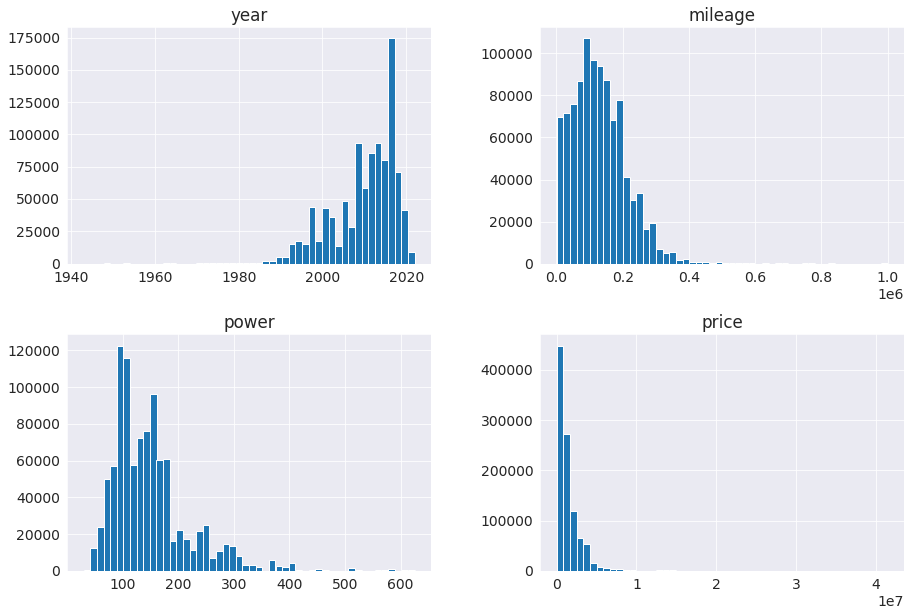

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

**Bar Chart**<br>
Bar charts are important to present categorical data. We have used bar charts to get the frequency of brand and transmission of car sold in Russia.

Text(0.5, 0, 'Brand')

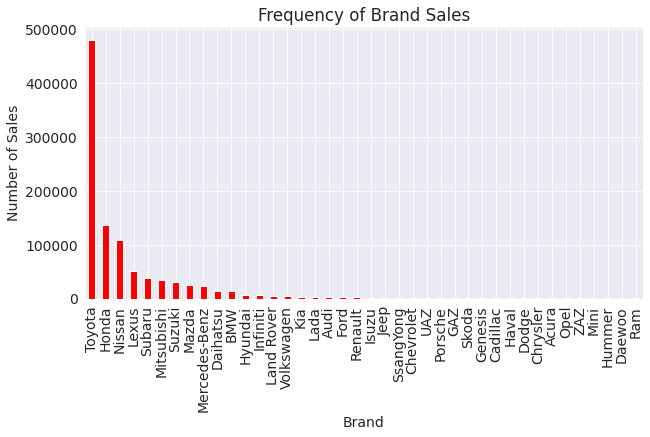

In [ ]:
df['brand'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5), color = 'red')
plt.title("Frequency of Brand Sales")
plt.ylabel('Number of Sales')
plt.xlabel('Brand')

Text(0.5, 0, 'Transmission')

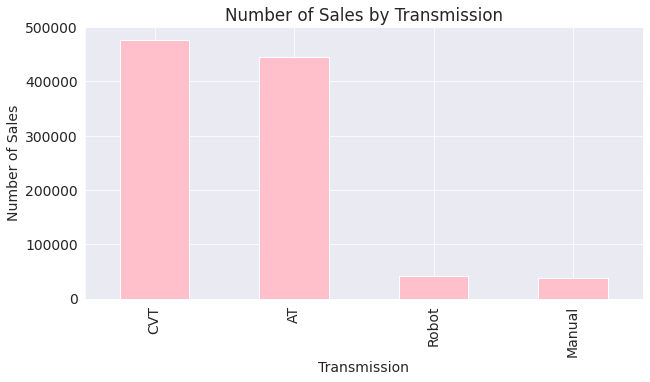

In [ ]:
df.transmission.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5), color = 'pink')
plt.title("Number of Sales by Transmission")
plt.ylabel('Number of Sales')
plt.xlabel('Transmission')

**Scatterplot**<br>
Scatterplot shows the relationship between two variables. By observing the scatterplot, we can know that there is a positive correlation between “power” and “price”. This means when “power” increases, “price” will also increase. 

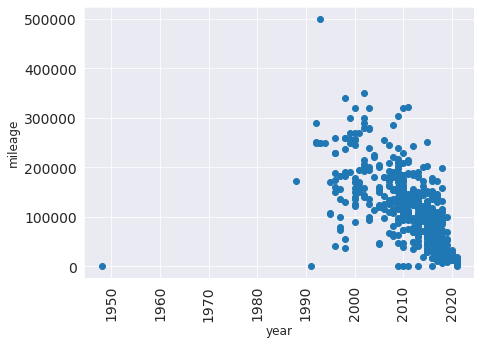

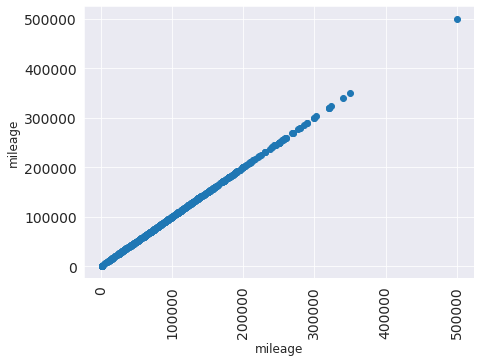

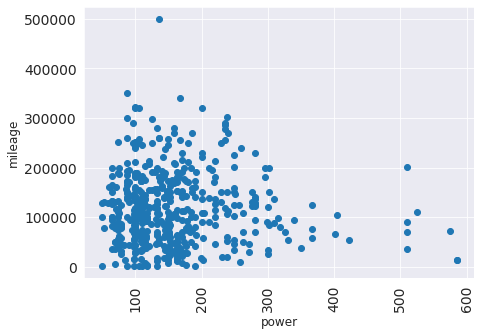

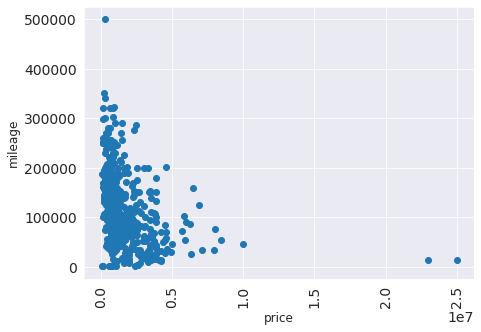

In [ ]:
for feature_name in df.columns:
    if df[feature_name].dtypes != "category":
      plt.figure(figsize=(7, 5));
      plt.scatter(df[feature_name][:500], df['mileage'][:500]);
      plt.ylabel('mileage', size=12);
      plt.xlabel(feature_name, size=12);
      plt.xticks(rotation=90)
    
plt.show();

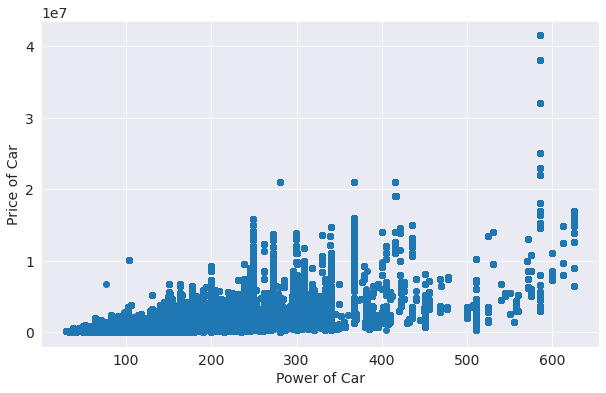

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['power'], df['price'])
ax.set_xlabel('Power of Car')
ax.set_ylabel('Price of Car')
plt.show()

**Heat Maps**<br>
Heat maps is also a way to find the relationship between features. The color of heat maps represented the value. 

,year,mileage,power,price
year,1.000000,-0.648310,0.080768,0.470285
mileage,-0.648310,1.000000,-0.046973,-0.391403
power,0.080768,-0.046973,1.000000,0.603627
price,0.470285,-0.391403,0.603627,1.000000


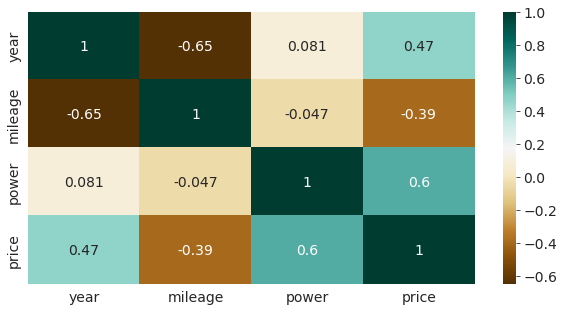

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**Boxplot**<br>
It displays the distribution of data based on minimum, Q1, median, Q3 and maximum. From here, we can know whether the data is skewed or symmetric and also detect whether there is an outlier. From the four box-plot below, we know that there exist outliers. 

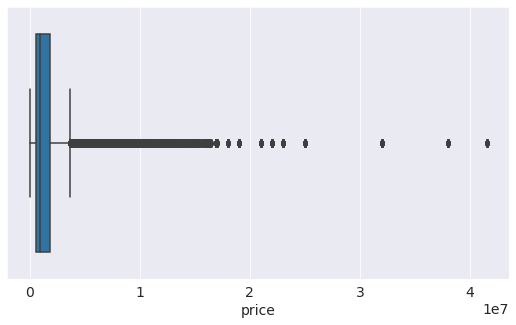

In [ ]:
sns.boxplot(x=df['price'])

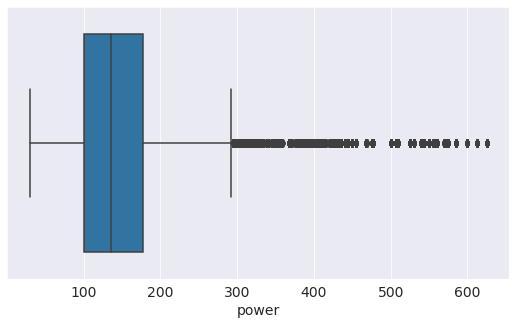

In [ ]:
sns.boxplot(x=df['power'])

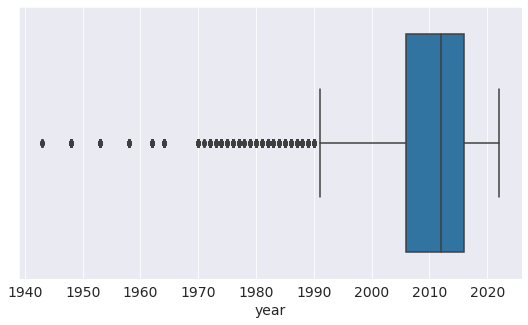

In [ ]:
sns.boxplot(x=df['year'])

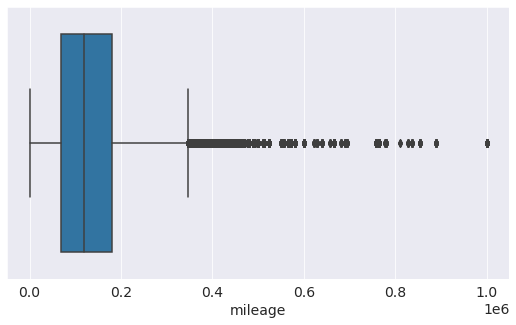

In [ ]:
sns.boxplot(x=df['mileage'])

## Asking and Answering Questions

A total of 5 questions will be asked in this section and all of them were answered by using pandas, series or visualization(matplotlib & seaborn).



#### Q1: How many bodytype of car on sales exist for each brand and which bodytype is the most popular?

Pandas library (groupby()) has been used to group the data by bodyType and calculate the number of sales for each brand by using the value_counts() function. Since the data will consist of multi-index, unstack() has been used to pivot the level of the indexed columns. 

In [ ]:
# To get the number of body type for each brand of car
data = df.groupby('bodyType')['brand'].value_counts()
data = data.unstack()
data

,Acura,Audi,BMW,Bentley,Cadillac,Chery,Chevrolet,Chrysler,Citroen,Daewoo,...,SsangYong,Subaru,Suzuki,Toyota,UAZ,Volkswagen,Volvo,Vortex,ZAZ,Zotye
bodyType,,,,,,,,,,,,,,,,,,,,,
coupe,0,40,57,18,0,0,88,32,0,0,...,0,0,0,2030,0,0,0,0,222,0
hatchback 3 door,0,12,0,0,0,0,18,0,0,0,...,0,0,48,2094,0,49,0,0,0,0
hatchback 5 doors,0,270,21,0,0,17,314,126,17,13,...,0,4095,14472,53905,0,267,0,0,0,0
jeep 3 doors,0,0,0,0,0,0,0,0,0,0,...,20,0,9076,1551,0,0,0,0,0,0
jeep 5 doors,217,1304,9369,0,399,89,467,0,0,91,...,677,22540,5568,144182,1104,2194,171,42,0,20
liftback,0,347,122,0,0,17,0,0,0,0,...,0,0,0,40650,0,106,0,0,0,0
minivan,0,0,0,0,0,0,13,16,0,31,...,0,200,419,72782,0,155,0,0,0,0
open,0,0,43,0,0,0,88,0,0,0,...,0,0,0,182,0,0,0,0,0,0
pickup,0,0,0,0,0,0,0,0,0,0,...,615,0,0,5821,55,109,0,0,0,0


By using value_counts(), we can calculate the occurrence of each bodyType in the data. 

In [ ]:
# To find the most popular body type
data3 = df['bodyType'].value_counts()
data3

jeep 5 doors         350766
sedan                178034
hatchback 5 doors    170329
minivan              124513
station wagon         86114
liftback              51701
jeep 3 doors          18310
pickup                 9445
hatchback 3 door       5839
coupe                  5777
open                   1268
Name: bodyType, dtype: int64

A bar chart from seaborn library has been used to show the most popular body type of car.

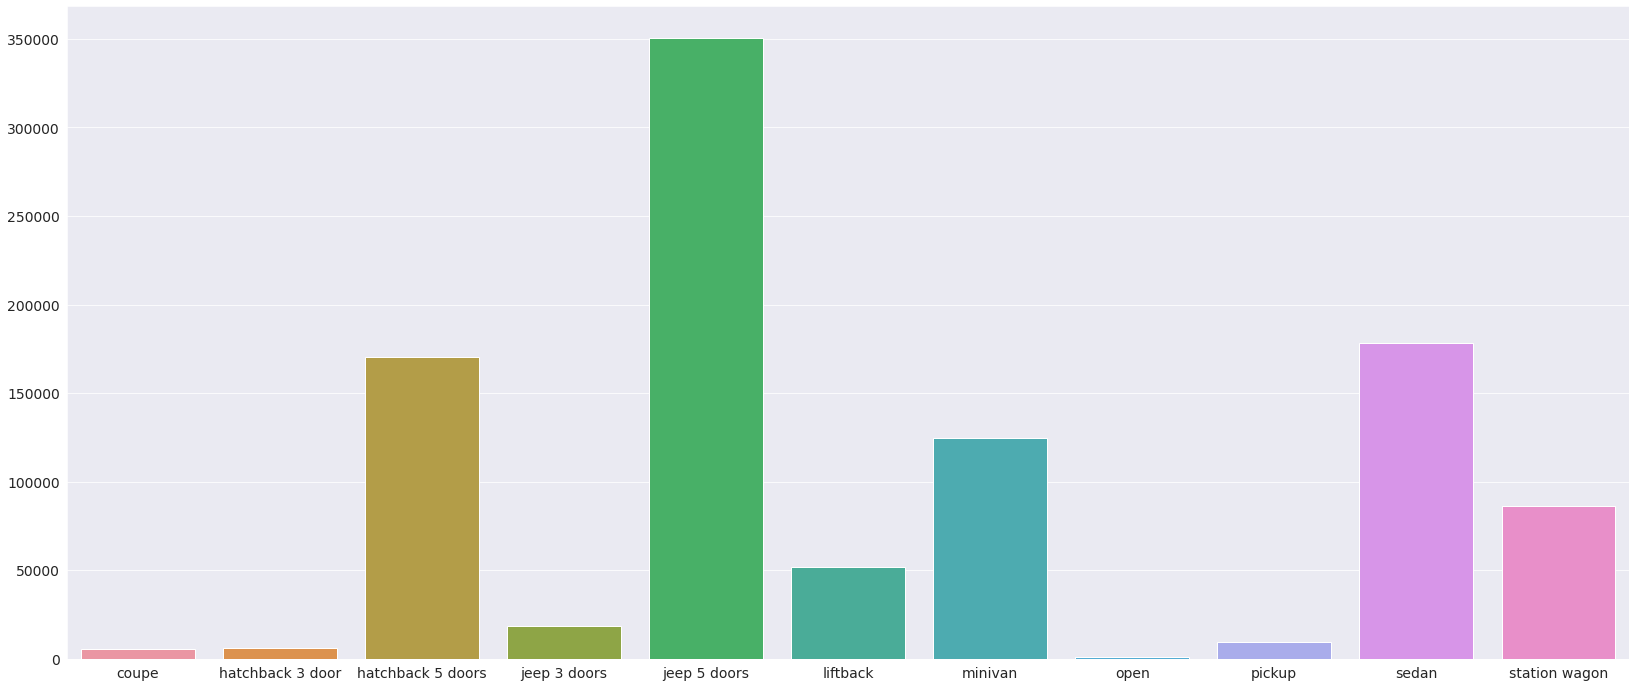

In [ ]:
plt.figure(figsize=(28,12))
sns.barplot(x=data3.index, y=data3.values)

Answer: Based on dataframe and bar chart, there are 11 body types and the most popular body type is jeep 5 doors. The body type of each brand of car can be observed one by one from the dataframe. For example, the Acura brand has sold 217 jeep 5 doors and 22 sedan.

#### Q2: Does the mileage of car affect the interest of the customer to buy a used car?


value_counts() has been used to calculate the occurrence of the mileage of the car sold. 

In [ ]:
df['mileage'].value_counts()

200000.0    25398
1000.0      20875
150000.0    18663
100000.0    18526
250000.0    14865
            ...  
524000.0        8
472000.0        4
810000.0        3
411000.0        2
475000.0        1
Name: mileage, Length: 487, dtype: int64

Seaborn library which is distplot() will show the distribution of mileage for the car sold in Russia. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


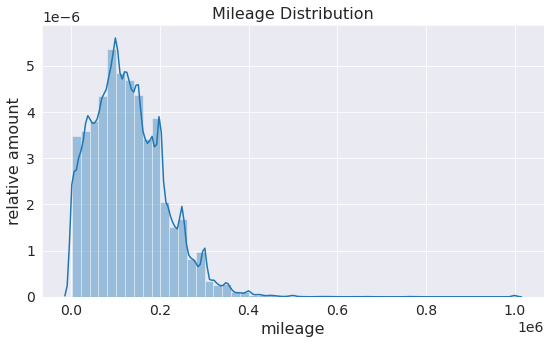

In [ ]:
sns.distplot(df.mileage)
plt.xlabel('mileage',fontsize=16)
plt.ylabel('relative amount',fontsize=16)
plt.title('Mileage Distribution',fontsize=16)
plt.show()

Answer: From the graph, it can be concluded that the mileage of a car will affect the interest of customers to buy the car because when the mileage increases, there are less customers to buy the car. 

#### Q3: What is the relation between the number of cars for sale according to the year they were manufactured?

value_counts() has been used to calculate the number of cars sold over the years of manufactured.

In [ ]:
data = df['year'].value_counts()
data

2017    106702
2015     80216
2018     71136
2016     67622
2009     59794
2010     58405
2012     50898
2013     50051
2014     43356
2011     34645
2008     33543
2007     28298
2006     24626
2005     24094
2000     23467
1998     22964
2002     22841
2019     21526
1997     20927
2020     19796
2001     19580
1999     17174
1996     15053
2004     13507
2003     13457
1995     10513
2021      8814
1992      7709
1993      7618
1994      6594
1991      4722
1990      2972
1989      2111
1988      1821
1987      1221
1982       628
1986       609
1979       541
1985       525
1977       410
1984       374
1970       173
1981       170
1983       155
1972       107
1953       104
2022        91
1976        88
1964        55
1974        53
1962        43
1948        42
1980        40
1958        32
1975        22
1973        20
1978        17
1943        13
1971        11
Name: year, dtype: int64

lineplot() from seaborn library is used to plot the number of cars sold over the year.

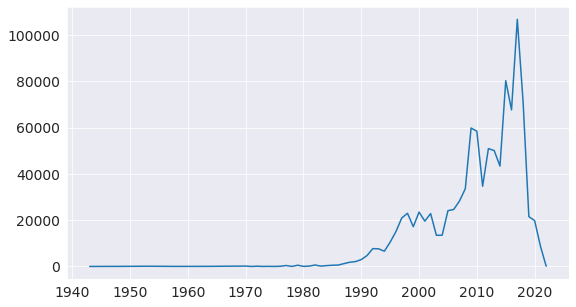

In [ ]:
sns.lineplot(x=data.index, y=data.values, data=data)

Answer: The most recent manufactured car will have higher sales compared to the car that was manufactured in the earlier year. 

#### Q4: How does the sales of car in different city in Russia?

The data is grouped into location by using the pandas library function and calculates the sum of the price(sum()). Then, the nlargest() function aims to get the top 10 locations that have highest sales. 

In [ ]:
data = df.groupby(['location'])['price'].sum()
data = data.nlargest(10)
data

location
Vladivostok      1.049740e+12
Ussurijsk        2.115338e+11
Nahodka          8.886404e+10
Artem            3.976266e+10
Arsenev          1.259980e+10
Spassk-Dalnij    1.127248e+10
Dalnegorsk       1.039080e+10
Dalnerechensk    9.983961e+09
Bolshoj Kamen    7.327723e+09
Lesozavodsk      6.887392e+09
Name: price, dtype: float64

To obtain a better view, we plot the pie chart by using matplotlib library function (pie) and label the legends based on locations of car sold. 

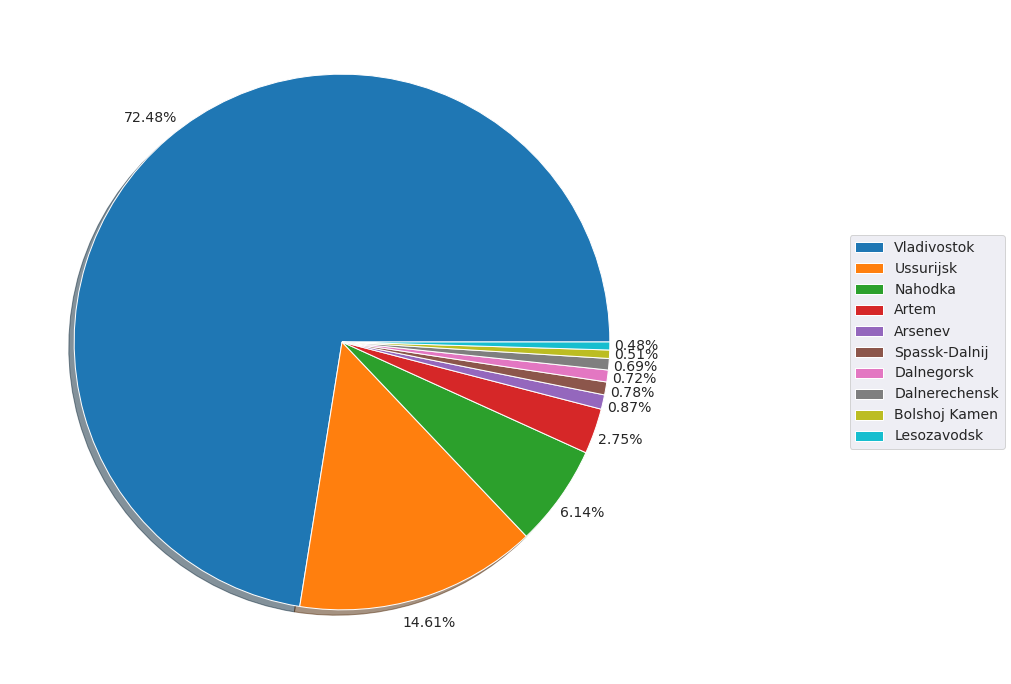

In [ ]:
plt.rcParams['figure.figsize'] = (12, 13)
plt.pie(data, shadow = True, autopct = '%.2f%%', pctdistance=1.1)
plt.axis('off')
plt.legend(data.index, loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()

Answer: According to both dataframe and pie chart, the sales of cars varies across locations but Vladivostok has the highest sales of cars. 

#### Q5: How does the price of car affected by the year manufactured for each engine displacement?

We would like to know will the year manufactured and engine displacement affect the price of the car. However, the engine displacement is in string data type, we will extract the numeric value from the engine displacement and change its data type to float. 

In [ ]:
data2 = df
litter = []
for i in df.engineDisplacement:
  j = i[0:3]
  litter.append(j)
data2['litter'] = litter
data2 = data2.astype({'litter': float})
data2

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,location,litter
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,Vladivostok,3.0
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,Vladivostok,5.0
5,Lexus,RX350,jeep 5 doors,burgundy,Gasoline,2016,150000.0,AT,301.0,3500000,3.5 AT F Sport Luxury,2GR-FKS,3.5 LTR,Vladivostok,3.5
8,Nissan,Note,hatchback 5 doors,grey,Gasoline,2016,58000.0,CVT,79.0,850000,1.2 X,HR12DE,1.2 LTR,Artem,1.2
10,Toyota,Harrier,jeep 5 doors,white,Gasoline,2017,20000.0,AT,231.0,3300000,2.0 Turbo Elegance GR Sport 4WD,8AR-FTS,2.0 LTR,Vladivostok,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513192,Toyota,Prius,liftback,grey,Gasoline,2011,190000.0,CVT,99.0,910000,1.8 G touring selection,2ZR-FXE,1.8 LTR,Ussurijsk,1.8
1513194,Toyota,Prius,liftback,white,Gasoline,2012,268000.0,CVT,99.0,930000,1.8 L,2ZR-FXE,1.8 LTR,Vladivostok,1.8
1513197,Lexus,GX470,jeep 5 doors,black,Gasoline,2002,170000.0,AT,235.0,1680000,4.7,2UZ-FE,4.7 LTR,Ussurijsk,4.7
1513198,Nissan,Safari,jeep 5 doors,green,Diesel,1997,313000.0,AT,160.0,999000,4.2 Granroad limited diesel turbo 4WD,TD42T,4.2 LTR,Nahodka,4.2


Then, the data is grouped by using the 'year' and 'litter' columns and groupby() is used to perform this function. mean() is used to get the sum of price and sort_values is aimed to sort the price columns descending. 

In [ ]:
price_factor = data2.groupby(['year', 'litter'])['price'].mean().sort_values(ascending=False)
price_factor = pd.DataFrame(price_factor)
price_factor = price_factor.reset_index()
price_factor

,year,litter,price
0,2018,4.0,2.319642e+07
1,2021,6.2,1.900000e+07
2,2020,4.4,1.582147e+07
3,2020,5.7,1.420134e+07
4,2021,3.4,1.394809e+07
...,...,...,...
909,1973,1.2,5.500000e+04
910,1984,1.3,5.476923e+04
911,1948,2.1,5.000000e+04
912,1991,0.8,4.000000e+04


A scatter plot of “price” against “litter” and "price" against "year" was plotted by using seaborn library(lmplot) in order to know whether litter and year of manufacture of car will affect the price of car.

<Figure size 1440x1080 with 0 Axes>

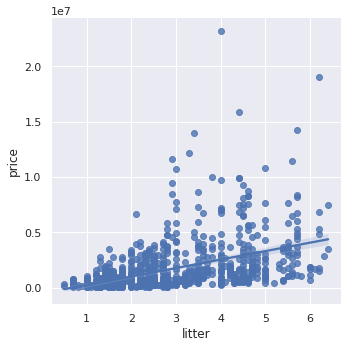

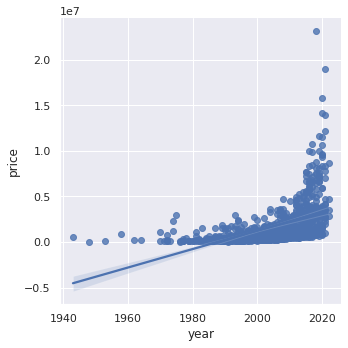

In [ ]:
plt.figure(figsize=(20, 15))
sns.lmplot(data=price_factor,x='litter',y='price')
sns.lmplot(data=price_factor,x='year',y='price');

Answer: Overall, the price will increase when the engine displacement is larger and the manufactured year is latest.

## Inferences and Conclusion

Summary of all the inferences drawn from the analysis and conclusion about answering all the interesting questions has been drawn. 


---



In summary, we have gone through a series of steps from obtaining the dataset until analyzing the data. There are several interesting questions that have been asked in order to gain some insight about the data. Based on the analysis, we found that most of the people in Russia like to buy jeep 5 doors type of car and it is probably due to this car type being enough to accommodate the family size and the car space is flexible to adjust. <br><br>
Other than that, the number of cars sold increases when the cars have smaller mileage and were produced in the latest year. This is because a car with low mileage means it has better condition compared to the car that’s traveled many miles over the year. So, this can save a huge amount of money on maintenance and servicing costs. Then, a car that has been manufactured recently is preferred over older ones as it may provide more useful and safety functions like blind spot monitoring. However, the price becomes more expensive when the engine displacement is larger and the manufactured year is latest but the additional safety function and vehicle dynamic performance are worth more than the difference in price between old and new car. Thus, more customers think that the additional price of a Jeep 5 doors vehicle is considered cost-effective.<br><br>
 
Moreover, the location will seriously affect the sale of cars. For example, Vladivostok has the highest sales of cars, probably due to it is the head of Russian car maker so it will have a high reputation. 


## References and Future Work

Future investigation about the car sales and some resources that help to complete this assignment. 

From this dataset, I have understood the preference of the Russian when buying a car. Since a car is a necessary item for most people, we can manipulate the data in order to help customers make a better decision when deciding whether to buy or sell a car in Russia. There are also some columns that have not been explored in this project. Therefore, we wish to investigate and understand more about the car sales by getting more insight from this dataset. 

**Resources**<br>
[What is low milleage?](https://heycar.co.uk/guides/what-is-low-mileage)<br>
[Car Sales in Russia](https://auto.economictimes.indiatimes.com/news/passenger-vehicle/cars/russias-avtovaz-says-sales-jump-80-in-august-from-july/94045719)<br>
[Seaborn](https://colab.research.google.com/drive/1GWKtrW5GqZ8ifOh2deHLThxCpBE14A2c)<br>
[Matplotlib](https://colab.research.google.com/drive/1Sk44p68l7wwrldwtZ_jpQ9-CTeDDcpTH)<br>
[4 strategies how to deal with large datasets in Pandas](https://www.vantage-ai.com/en/blog/4-strategies-how-to-deal-with-large-datasets-in-pandas)<br>
[NYC Taxi Trip Duration EDA notebook](https://github.com/drshahizan/Python_Tutorial/blob/main/big%20data/Lab_3_NYC_EDA.ipynb)<br>
[eCommerce behavior data from multi category store](https://github.com/drshahizan/Python_Tutorial/blob/main/big%20data/Lab_5_Dataset_285_million_users.ipynb)<br>
[Charts for Three or More Variables](https://help.syncfusion.com/predictive-analytics/charts-for-three-or-more-variables)

